Temperature profile of the furnace using a K-type thermocouple.

##Set-up
- Ungrounded K-type thermocouple with 18 inch metal sheath (TJ36-CAXL-316U-18)
- Mounted on a holder and inserted into the center of the tube; careful to avoid touching walls of tube.
- Position measured from the plastic ring on the thermocouple to the edge of the furnace

##Measurement 1 - 500C
Initial
- 11.5 cm LHS: 533-6 C
- 11.5 cm RHS: 531-2 C

1 hr later
- 11.5 cm RHS: 528-9 C
- 11.5 cm LHS: 527-9 C

##Measurement 2 - 900C
- Ramp from 500 -> 900 C
- Settle time: ~30 min 
- Time between measurements: 3-5 min

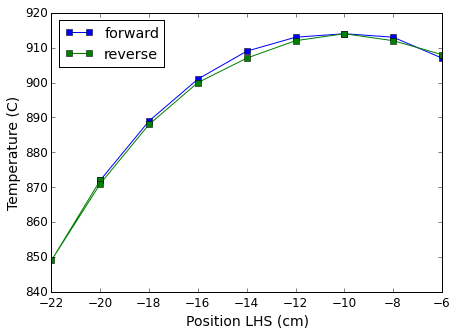

In [1]:
poss1, temps1 = loadtxt('../data/150601_thermocouple_calibration_900C_LHS_1.txt', unpack = True)

plot(-poss1[:8], temps1[:8], 's-', label = 'forward')
plot(-poss1[7:], temps1[7:], 's-', label = 'reverse')
xlabel('Position LHS (cm)')
ylabel('Temperature (C)')
legend(loc = 'upper left')

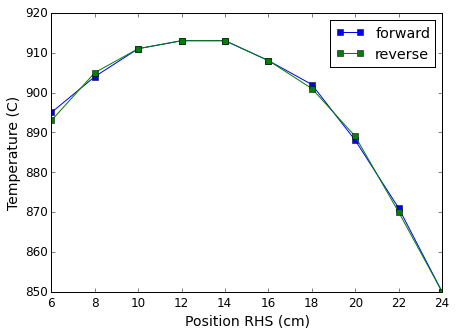

In [2]:
poss2, temps2 = loadtxt('../data/150601_thermocouple_calibration_900C_RHS_1.txt', unpack = True)

plot(poss2[:10], temps2[:10], 's-', label = 'forward')
plot(poss2[9:], temps2[9:], 's-', label = 'reverse')
xlabel('Position RHS (cm)')
ylabel('Temperature (C)')
legend(loc = 'upper right')

Center point
- 13 cm from RHS = 0.75 cm to the right of the center notch
- 10 cm from LHS = 1.75 cm "
- avg = 1.25 cm

Quadratic fit: -0.49*x^2 + 914.7


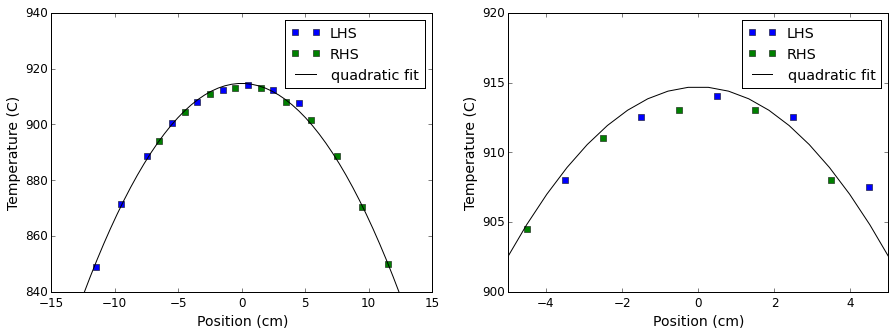

In [21]:
offset1 = 10.5
offset2 = 12.5

avg1 = {}
for i, pos in enumerate(poss1):
    if not pos in avg1: 
        avg1[pos] = temps1[i]
    else:
        avg1[pos] = (avg1[pos] + temps1[i])/2
avg_poss1 = -array([k for k,v in avg1.items()])+offset1
avg_temps1 = array([v for k,v in avg1.items()])
        
avg2 = {}
for i, pos in enumerate(poss2):
    if not pos in avg2: 
        avg2[pos] = temps2[i]
    else:
        avg2[pos] = (avg2[pos] + temps2[i])/2
avg_poss2 = array([k for k,v in avg2.items()])-offset2
avg_temps2 = array([v for k,v in avg2.items()])
    
total_poss = concatenate((avg_poss1, avg_poss2))
total_temps = concatenate((avg_temps1, avg_temps2))
    
c = polyfit(total_poss, total_temps, 2)

figure(figsize = (15,5))

subplot(121)
plot(avg_poss1, avg_temps1, 'sb', label = 'LHS')
plot(avg_poss2, avg_temps2, 'sg', label = 'RHS')
plot(linspace(-13,13), c[0]*linspace(-13,13)**2  + c[2], 'k', label = 'quadratic fit')
legend()
xlabel('Position (cm)')
ylabel('Temperature (C)')
ylim(840, 940)

subplot(122)
plot(avg_poss1, avg_temps1, 'sb', label = 'LHS')
plot(avg_poss2, avg_temps2, 'sg', label = 'RHS')
plot(linspace(-13,13), c[0]*linspace(-13,13)**2  + c[2], 'k', label = 'quadratic fit')
legend()
xlabel('Position (cm)')
ylabel('Temperature (C)')
xlim(-5,5)
ylim(900, 920)

print('Quadratic fit: %0.2f*x^2 + %0.1f' % (c[0], c[2]))

##Thermocouple response time
- Cooling down: 900 -> 35 in ~10 min
- Heating up: 35 -> 900 in ~3 min

##Furnace ramp time
- set temp: 900 C

In [1]:
import pandas as pd
import csv

df = pd.read_csv('../data/150604_CNT_furnace_ramp_time.txt', skiprows = 1, delimiter = ' ')

labels = next(csv.reader(open('../data/150604_CNT_furnace_ramp_time.txt')))
labels = dict(zip(list(df.columns), labels))

df.rename(columns = labels)

,Time (min),Furnace (C),Thermocouple (C)
0,2,500,400
1,4,750,800
2,6,900,942
3,9,900,928
4,15,900,921
5,20,900,918
6,30,900,916
7,45,900,915


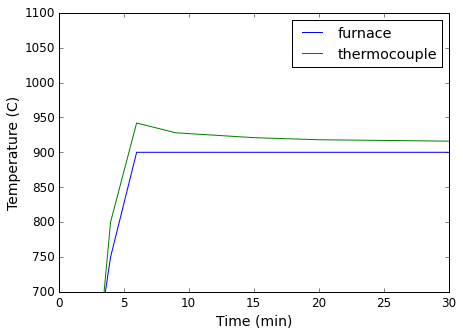

In [5]:
plot(df.time, df.furnace, label = 'furnace')
plot(df.time, df.thermocouple, label = 'thermocouple')
xlabel(labels['time'])
ylabel('Temperature (C)')
ylim(700, 1100)
xlim(0,30)
legend();